<a href="https://colab.research.google.com/github/ShishkinaMarina/LAB/blob/main/04_2_shishkina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа 4-2: Линейная регрессия 2

Name:

Email:


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [14]:
# imports and setup

import scipy as sc
import numpy as np
import seaborn as sns

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [5]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45218.885000,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35244.273165,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10354.000000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21007.250000,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33115.500000,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57470.750000,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186634.000000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


In [6]:
model = sm.ols(formula="Limit ~ Rating", data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        08:42:02   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель показывает очень высокую степень соответствия данным, о чем свидетельствуют значения R-квадрата и скорректированного R-квадрата, близкие к 1 (0.994). Это означает, что 99.4% вариации кредитного лимита объясняется  переменной Rating (кредитный рейтинг)

Высокое значение F-статистики (6.348e+04) и очень низкое p-значение (0.00) указывают на то, что модель в целом статистически значима. Это означает, что маловероятно получить такие результаты, если бы рейтинг не оказывал никакого влияния на лимит.

Низкие p-значения (0.000) для обоих коэффициентов (Intercept и Rating) указывают на то, что оба коэффициента статистически значимы. Это означает, что и intercept, и рейтинг вносят значимый вклад в предсказание кредитного лимита.

Положительная связь:Коэффициент Rating равен 14.8716, что указывает на положительную связь между кредитным рейтингом и кредитным лимитом. Это означает, что с увеличением кредитного рейтинга на 1 единицу кредитный лимит увеличивается в среднем на $14.87.

Уравнение модели: Limit = -542.9282 + 14.8716 * Rating



**Ваш ответ:**

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



In [4]:
model1 = sm.ols(formula="Limit ~ Income + Cards + Age + Education + Balance", data=credit).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.32e-238
Time:                        11:55:33   Log-Likelihood:                -3101.0
No. Observations:                 400   AIC:                             6214.
Df Residuals:                     394   BIC:                             6238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1752.3883    170.621     10.271      0.000    1416.947    2087.830
Income         0.0323      0.001     34.737      0.000       0.031       0.034
Cards        -61.7552     20.904     -2.954      0.003    -102.852     -20.658
Age            1.9710      1.683      1.171      0.242      -1.337       5.279
Education     -4.9297      9.107     -0.541      0.589     -22.834      12.974
Balance        3.1921      0.070     45.291      0.000       3.053       3.331
==============================================================================
Omnibus:                       78.568   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.063
Skew:                          -1.356   Prob(JB):                     1.15e-27
Kurtosis:                       3.306   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Модель демонстрирует высокую степень соответствия данным,  R-квадрат = 0.940.  Это означает, что  94% вариации  кредитного лимита объясняется выбранными  независимыми  переменными (доход, количество карт, возраст, образование, баланс).

Высокое значение F-статистики (1242) и  низкое p-значение (< 0.05) указывают на общую статистическую значимость модели.  Это означает, что маловероятно получить такие результаты случайно,  если бы переменные  не влияли на лимит.

**Значимые предикторы:**

Income (доход): Статистически значимый  предиктор (p-значение < 0.05), положительный  коэффициент (0.0323) - с увеличением дохода  кредитный лимит  растет.
   
Cards (количество карт): Статистически значимый  предиктор (p-значение < 0.05),  отрицательный  коэффициент (-61.7552) - с увеличением количества карт  кредитный лимит уменьшается.

Balance (баланс): Статистически значимый  предиктор (p-значение < 0.05),  положительный коэффициент (3.1921) - с увеличением баланса  кредитный лимит увеличивается.

**Незначимые предикторы:**

Age (возраст):Не является  статистически значимым предиктором (p-значение > 0.05).  

Education (образование): Не является  статистически значимым  предиктором (p-значение > 0.05).


In [6]:
#построю модели, включая только статистически значимые предикторы

model3 = sm.ols(formula="Limit ~ Cards", data=credit).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04167
Date:                Sun, 26 May 2024   Prob (F-statistic):              0.838
Time:                        12:05:39   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4684.6662    274.978     17.037      0.000    4144.076    5225.257
Cards         17.2219     84.369      0.204      0.838    -148.643     183.087
==============================================================================
Omnibus:                       46.466   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.069
Skew:                           0.833   Prob(JB):                     3.33e-14
Kurtosis:                       3.973   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model4 = sm.ols(formula="Limit ~ Income", data=credit).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.39e-87
Time:                        12:06:10   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.8694    114.829     20.812      0.000    2164.123    2615.616
Income         0.0519      0.002     25.888      0.000       0.048       0.056
==============================================================================
Omnibus:                      141.700   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.008
Skew:                          -0.064   Prob(JB):                     2.74e-05
Kurtosis:                       1.885   Cond. No.                     9.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model5 = sm.ols(formula="Limit ~ Balance", data=credit).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.53e-119
Time:                        12:06:28   Log-Likelihood:                -3393.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     398   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2485.9566     88.586     28.063      0.000    2311.802    2660.111
Balance        4.3261      0.128     33.879      0.000       4.075       4.577
==============================================================================
Omnibus:                       21.227   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.462
Skew:                           0.424   Prob(JB):                     4.00e-07
Kurtosis:                       4.024   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

При более подробном рассмотрении отдельно каждого из факторов была выявлена крайне низкая степень соответствия фактора Cards: R-квадрат  равен 0.000, что означает, что модель практически не объясняет  вариацию кредитного лимита.  Другими словами,  переменная "Cards" (количество карт) не является информативным  предиктором  для  Limit в данной модели. Модель также статистически не значима: Низкое значение F-статистики (0.04167) и  высокое p-значение (0.838,  намного больше 0.05) указывают на это

Остальные модели показывают высокую степень зависимости от них кредитного лимита


In [10]:
model6 = sm.ols(formula="Limit ~ Balance + Income", data=credit).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.37e-241
Time:                        12:18:55   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
Income         0.0327      0.001     35.691      0.000       0.031       0.035
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     9.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значение R-squared равно 0.939, что говорит о том, что 93.9% вариации кредитного лимита объясняется остатком на счете и доходом. Это очень высокий показатель, указывающий на отличную предсказательную способность модели.

Статистическая значимость:
И остаток на счете, и доход являются статистически значимыми предикторами кредитного лимита (p-value < 0.001 для обоих). Это подтверждается очень высокими значениями t-статистики.

Каждый рубль на балансе увеличивает кредитный лимит в среднем на 3.16 рубля, при прочих равных условиях.

Каждый рубль дохода увеличивает кредитный лимит в среднем на 0.03 рубля, при прочих равных условиях.


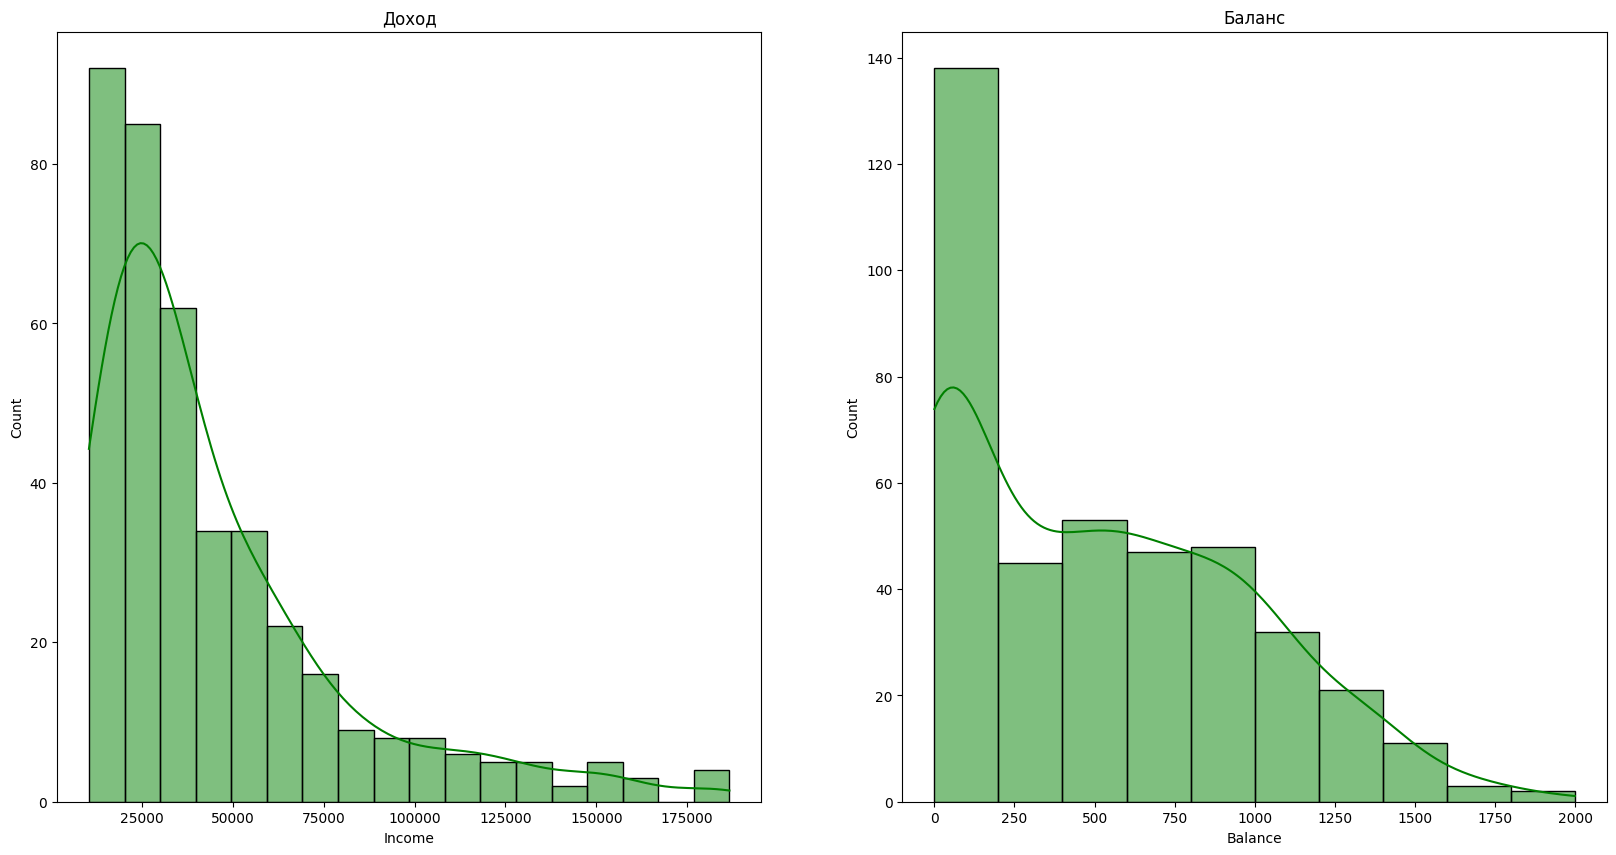

In [23]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.histplot(credit['Income'],kde=True, color='green')
plt.title('Доход')
plt.subplot(1, 2, 2)
sns.histplot(credit['Balance'], kde=True, color='green')
plt.title('Баланс')
plt.show()

## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [40]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

In [41]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1


Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


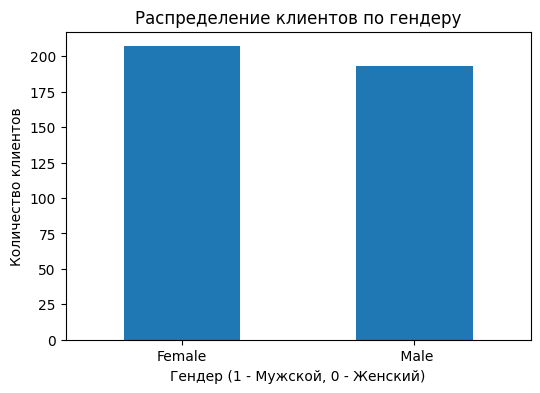

In [30]:
plt.figure(figsize=(6, 4))
credit['Gender'].value_counts().plot(kind='bar')
plt.title('Распределение клиентов по гендеру')
plt.xlabel('Гендер (1 - Мужской, 0 - Женский)')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)  # Горизонтальные подписи на оси X
plt.show()

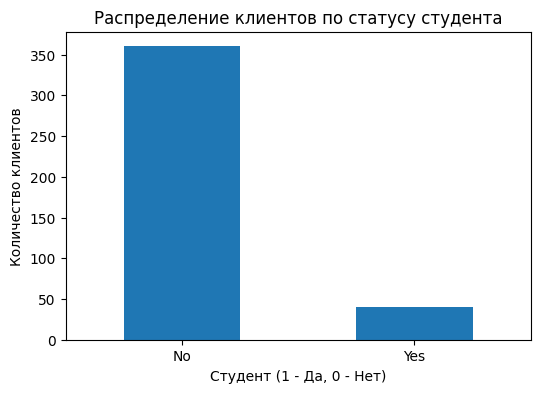

In [32]:
plt.figure(figsize=(6, 4))
credit['Student'].value_counts().plot(kind='bar')
plt.title('Распределение клиентов по статусу студента')
plt.xlabel('Студент (1 - Да, 0 - Нет)')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.show()

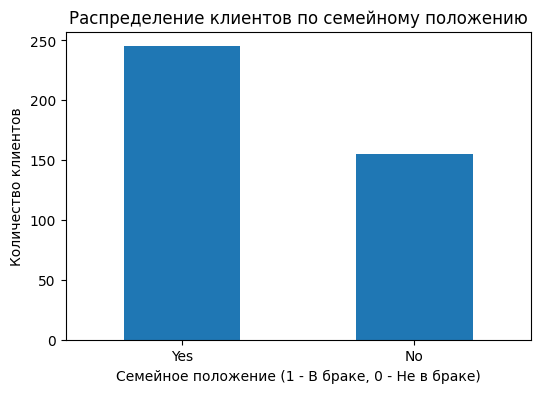

In [33]:
plt.figure(figsize=(6, 4))
credit['Married'].value_counts().plot(kind='bar')
plt.title('Распределение клиентов по семейному положению')
plt.xlabel('Семейное положение (1 - В браке, 0 - Не в браке)')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.show()


Рассмотрю подробнее столбец Married

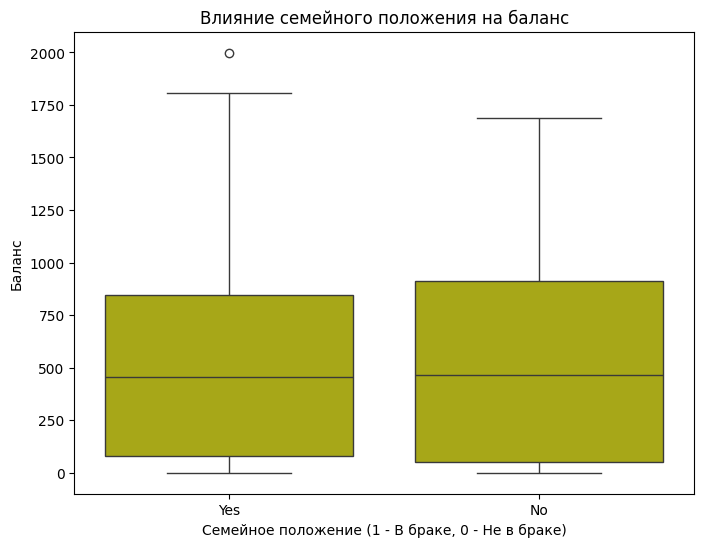

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Married', y='Balance', data=credit, color='y')
plt.title('Влияние семейного положения на баланс')
plt.xlabel('Семейное положение (1 - В браке, 0 - Не в браке)')
plt.ylabel('Баланс')
plt.show()

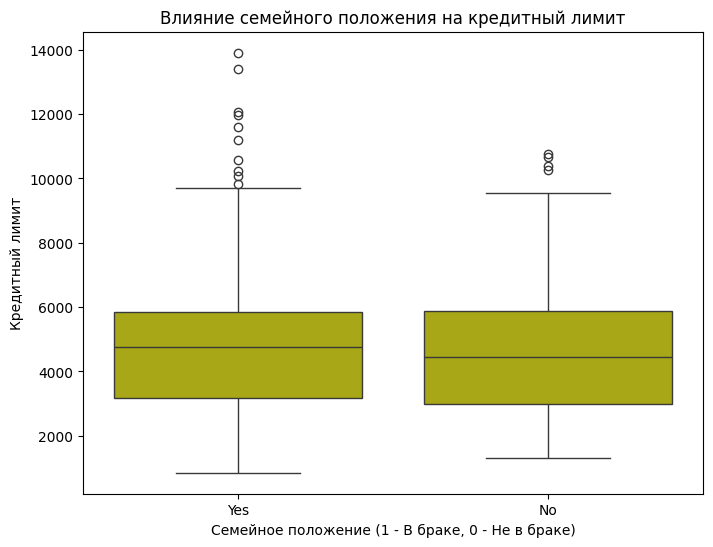

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Married', y='Limit', data=credit, color='y')
plt.title('Влияние семейного положения на кредитный лимит')
plt.xlabel('Семейное положение (1 - В браке, 0 - Не в браке)')
plt.ylabel('Кредитный лимит')
plt.show()

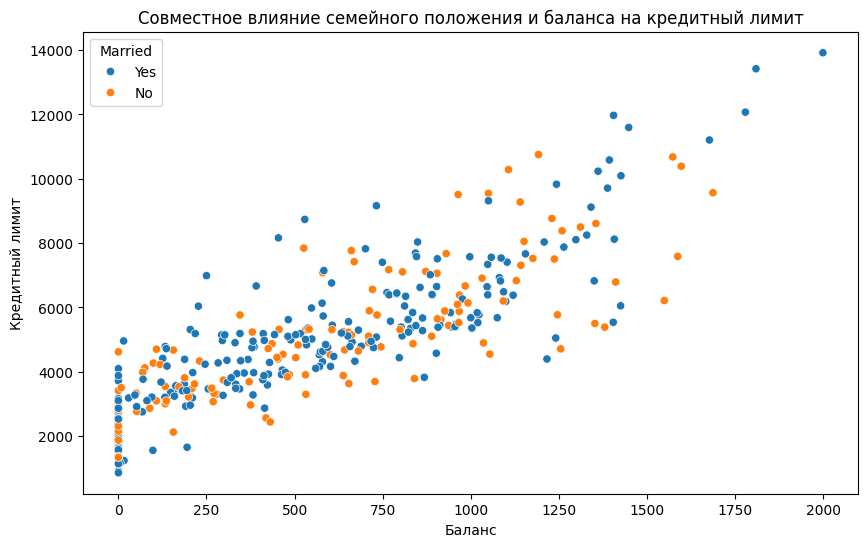

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Limit', hue='Married', data=credit)
plt.title('Совместное влияние семейного положения и баланса на кредитный лимит')
plt.xlabel('Баланс')
plt.ylabel('Кредитный лимит')
plt.show()

По графикам прослеживается, что семейное положение несильно влияет на кредитный лимит, хотя влияет на величину дохода. Построю регрессионную модель

In [42]:
model_marriage = sm.ols(formula="Limit ~ Balance + Married_num", data=credit).fit()
model_marriage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     576.3
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.94e-118
Time:                        13:18:08   Log-Likelihood:                -3392.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     397   BIC:                             6803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2380.9532    115.342     20.643      0.000    2154.195    2607.711
Balance         4.3271      0.128     33.929      0.000       4.076       4.578
Married_num   170.5625    120.205      1.419      0.157     -65.756     406.881
==============================================================================
Omnibus:                       20.881   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.268
Skew:                           0.428   Prob(JB):                     7.27e-07
Kurtosis:                       3.982   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Модель объясняет 74.4% вариации кредитного лимита (R-squared = 0.744), что является достаточно высоким показателем.

Баланс (Balance):Сильно значимый предиктор кредитного лимита (p-value < 0.001). Увеличение баланса на 1 единицу связано с увеличением кредитного лимита на 4.3271 единиц, при прочих равных условиях.

Семейное положение (Married_num): Переменная не является статистически значимой на уровне 5% (p-value = 0.157).  Это означает, что, основываясь на этих данных, нельзя утверждать, что семейное положение оказывает значимое влияние на кредитный лимит.
